Homework 7 : Web Scraping


In this assignment, we will get practice with gathering data from the internet. We will focus on data about sport statistics.
  
The questions guide you step-by-step through these approaches. Please post to Slack with any questions. 


### Rubric

Question | Points
--- | ---
Question 0 | 0
Question 1 | 1
Question 2.1 | 1
Question 2.2 | 1
Question 3.1 | 1
Question 3.2 | 1
Question 3.3 | 1
Question 4.1 | 1
Question 4.2 | 0
Total | 7

We can access vast amounts of data on the internet. We want to learn about web-scraping which is the process of gathering data from the internet through a program. We will study sports statistics on Wikipedia:

> https://en.wikipedia.org/wiki/1500_metres_world_record_progression

You can visit the page to scroll around the tables. We want to extract information from one of the tables to generate a chart of world records for women's 1500 meter race.

### 0. Load the Data

We will take three approaches to accessing the website. Along the way we will need three packages for web frameworks

-  `requests` package for sending requests and receiving responses
- `bs4` for parsing HTML
-  `lxml` for parsing HTML with XPath

Here we will focus on parsing data in the HTML format which is a common format for storing data on the internet.

In [1]:
# import some packages

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import requests
import lxml 
from bs4 import BeautifulSoup

# change some settings

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 8)
plt.rcParams['figure.figsize'] = (10,8)

In [2]:
# TEST

import sys

assert "numpy" in sys.modules and "np" in locals()
assert "pandas" in sys.modules and "pd" in locals()
assert "matplotlib" in sys.modules and "plt" in locals()
assert "lxml" in sys.modules and "requests" in sys.modules
assert "bs4" in sys.modules and "BeautifulSoup" in locals()

We should understand the support in the `pandas` package for HTML format. 

In [3]:
url = "https://en.wikipedia.org/wiki/1500_metres_world_record_progression"

We can us the function `read_html` which returns a list of tables on the website. 

In [4]:
tables = pd.read_html(url)
len(tables)

6

We have found six tables. Each table on the website becomes a DataFrame.

In [5]:
for table in tables:
    display(table.head(2))

,Time,Athlete,Date,Place
0,.mw-parser-output .sfrac{white-space:nowrap}.m...,J. Borel (FRA),1892,NaN
1,4:21,Fernand Meiers (FRA),1893-05-28,"Paris, France"


,Time,Auto,Athlete,Date,Place
0,3:55.8,NaN,Abel Kiviat (USA),1912-06-08,"Cambridge, Massachusetts, United States"
1,3:54.7,NaN,John Zander (SWE),1917-08-05,"Stockholm, Sweden"


,Time,Athlete,Date,Place
0,5:18.2,Anna Mushkina (URS),1927-08-19,"Moscow, Soviet Union"
1,5:07.0,Anna Mushkina (URS),1934-09-16,"Alma-Ata, Soviet Union"


,Time,Auto,Athlete,Date,Place
0,4:17.3+,NaN,Anne Smith (GBR),1967-06-03,"Chiswick, Great Britain"
1,4:15.6,NaN,Maria Gommers (NED),1967-10-24,"Sittard, Netherlands"


,".mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:""[ ""}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:"" ]""}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar a>span,.mw-parser-output .navbar a>abbr{text-decoration:inherit}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}vteIndex of athletics record progressions",".mw-parser-output .navbar{display:inline;font-size:88%;font-weight:normal}.mw-parser-output .navbar-collapse{float:left;text-align:left}.mw-parser-output .navbar-boxtext{word-spacing:0}.mw-parser-output .navbar ul{display:inline-block;white-space:nowrap;line-height:inherit}.mw-parser-output .navbar-brackets::before{margin-right:-0.125em;content:""[ ""}.mw-parser-output .navbar-brackets::after{margin-left:-0.125em;content:"" ]""}.mw-parser-output .navbar li{word-spacing:-0.125em}.mw-parser-output .navbar a>span,.mw-parser-output .navbar a>abbr{text-decoration:inherit}.mw-parser-output .navbar-mini abbr{font-variant:small-caps;border-bottom:none;text-decoration:none;cursor:inherit}.mw-parser-output .navbar-ct-full{font-size:114%;margin:0 7em}.mw-parser-output .navbar-ct-mini{font-size:114%;margin:0 4em}vteIndex of athletics record progressions.1"
0,World,Sprinting 50 metres 60 metres men women 100 me...
1,Sprinting,50 metres 60 metres men women 100 metres men w...


,0,1
0,Sprinting,50 metres 60 metres men women 100 metres men w...
1,Middle distance,800 metres 1000 metres 1500 metres Mile run 20...


We find that we want the fourth table.

In [6]:
tables[3].head(5)

,Time,Auto,Athlete,Date,Place
0,4:17.3+,NaN,Anne Smith (GBR),1967-06-03,"Chiswick, Great Britain"
1,4:15.6,NaN,Maria Gommers (NED),1967-10-24,"Sittard, Netherlands"
2,4:12.4,NaN,Paola Pigni (ITA),1969-07-02,"Milan, Italy"
3,4:10.7,4:10.77,Jaroslava Jehličková (CZE),1969-09-20,"Athens, Greece"
4,4:09.6,4:09.62,Karin Burneleit (GDR),1971-08-15,"Helsinki, Finland"


The entries are strings. Before we process the data to generate a chart, we will explore two other approaches to accessing the data on the website. These methods are more versatile than `pandas` for handling data on the internet. 

### Question 1

We need a way to gather data from the website and store the data in memory. We can use an HTTP request to retrieve the page. 

In [7]:
response = requests.get(url)

We use the `requests` package. To retrieve the contents of the website, we use the GET request from HTTP.

In [8]:
response.request.method

'GET'

We examine the:

+ status of our request 
+ header for our request
+ header for the response to our request
+ content of the response (the web page)

In [9]:
response.status_code

200

In [10]:
dict(response.request.headers)

{'User-Agent': 'python-requests/2.24.0',
 'Accept-Encoding': 'gzip, deflate',
 'Accept': '*/*',
 'Connection': 'keep-alive'}

In [11]:
dict(response.headers)

{'date': 'Mon, 11 Jul 2022 18:05:40 GMT',
 'vary': 'Accept-Encoding,Cookie,Authorization',
 'server': 'ATS/8.0.8',
 'x-content-type-options': 'nosniff',
 'content-language': 'en',
 'last-modified': 'Thu, 07 Jul 2022 06:39:58 GMT',
 'content-type': 'text/html; charset=UTF-8',
 'content-encoding': 'gzip',
 'age': '33851',
 'x-cache': 'cp1081 miss, cp1077 hit/14',
 'x-cache-status': 'hit-front',
 'server-timing': 'cache;desc="hit-front", host;desc="cp1077"',
 'strict-transport-security': 'max-age=106384710; includeSubDomains; preload',
 'report-to': '{ "group": "wm_nel", "max_age": 86400, "endpoints": [{ "url": "https://intake-logging.wikimedia.org/v1/events?stream=w3c.reportingapi.network_error&schema_uri=/w3c/reportingapi/network_error/1.0.0" }] }',
 'nel': '{ "report_to": "wm_nel", "max_age": 86400, "failure_fraction": 0.05, "success_fraction": 0.0}',
 'set-cookie': 'WMF-Last-Access=12-Jul-2022;Path=/;HttpOnly;secure;Expires=Sat, 13 Aug 2022 00:00:00 GMT, WMF-Last-Access-Global=12-Jul-

In [12]:
response.content[:1000]

b'<!DOCTYPE html>\n<html class="client-nojs" lang="en" dir="ltr">\n<head>\n<meta charset="UTF-8"/>\n<title>1500 metres world record progression - Wikipedia</title>\n<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"9031eb18-4d71-41b0-becf-1b6b3e893661","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"1500_metres_world_record_progression","wgTitle":"1500 metres world record progression","wgCurRevisionId":1094497146,"wgRevisionId":1094497146,"wgArticleId":14824822,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["World athletics record progressions","1500 metres"],"wgPageContentLanguage":

What is the meaning of the response code 200?

1. Forbidden
1. Ok
1. Not Found
1. Unauthorized

In [13]:
q1 = 2

# YOUR CODE HERE
#raise NotImplementedError()

In [14]:
# TEST 

assert q1 in [1,2,3,4]


### Question 2

We do not want to extract information from the string with regular expressions. So we need to convert from string format to another format. Since we have structured data, we should take advantage of the organization as HTML. 

In [15]:
soup = BeautifulSoup(response.content, "html.parser")

The `bs4` package allows us to parse the HTML. The variable `soup` represents the data in a nested format resembling the tree-like structure of HTML  

In [16]:
soup_tables = soup.find_all('table')
len(soup_tables)

6

The package provides different functions to search for elements in the tree. The function `find_all()` allows us to search for the tag `table`. Note that we obtain all six tables.

In [17]:
soup_rows = soup_tables[3].find_all('tr')
soup_rows[:2]

[<tr>
 <th>Time</th>
 <th>Auto</th>
 <th>Athlete</th>
 <th>Date</th>
 <th>Place
 </th></tr>,
 <tr>
 <td><b>4:17.3+</b>
 </td>
 <td>
 </td>
 <td align="left"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="600" data-file-width="1200" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/en/thumb/a/ae/Flag_of_the_United_Kingdom.svg/23px-Flag_of_the_United_Kingdom.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/ae/Flag_of_the_United_Kingdom.svg/35px-Flag_of_the_United_Kingdom.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/a/ae/Flag_of_the_United_Kingdom.svg/46px-Flag_of_the_United_Kingdom.svg.png 2x" width="23"/> </span><a class="mw-redirect" href="/wiki/Anne_Smith_(middle-distance_runner)" title="Anne Smith (middle-distance runner)">Anne Smith</a> <span style="font-size:90%;">(<abbr title="Great Britain">GBR</abbr>)</span>
 </td>
 <td>1967-06-03
 </td>
 <td><a href="/wiki/Chiswick" title="Chiswick">Chiswick</a>, <a href="/wiki/G

#### Question 2.1

Remember that we are interested in the fourth table. The HTML tag for a row of a table is `tr`. The first row is a header and the subsequent rows contain the records.

In [18]:
soup_second_row = soup_rows[2]
soup_second_row_columns = soup_second_row.find_all('td')
soup_second_row_columns

[<td><b>4:15.6</b>
 </td>,
 <td>
 </td>,
 <td align="left"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_the_Netherlands.svg/23px-Flag_of_the_Netherlands.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_the_Netherlands.svg/35px-Flag_of_the_Netherlands.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_the_Netherlands.svg/45px-Flag_of_the_Netherlands.svg.png 2x" width="23"/> </span><a class="mw-redirect" href="/wiki/Maria_Gommers" title="Maria Gommers">Maria Gommers</a> <span style="font-size:90%;">(<abbr title="Netherlands">NED</abbr>)</span>
 </td>,
 <td>1967-10-24
 </td>,
 <td><a href="/wiki/Sittard" title="Sittard">Sittard</a>, <a href="/wiki/Netherlands" title="Netherlands">Netherlands</a>
 </td>]

The HTML tag for a column of a table is `td`. If we want to retrieve the name of the athlete in the second row of the table, then we need to access the third column.

In [19]:
soup_second_row_columns[2]

<td align="left"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="600" data-file-width="900" decoding="async" height="15" src="//upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_the_Netherlands.svg/23px-Flag_of_the_Netherlands.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_the_Netherlands.svg/35px-Flag_of_the_Netherlands.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/2/20/Flag_of_the_Netherlands.svg/45px-Flag_of_the_Netherlands.svg.png 2x" width="23"/> </span><a class="mw-redirect" href="/wiki/Maria_Gommers" title="Maria Gommers">Maria Gommers</a> <span style="font-size:90%;">(<abbr title="Netherlands">NED</abbr>)</span>
</td>

Note that the name `Maria Gommers` appears in the text.

In [20]:
soup_second_row_columns[2].text

'\xa0Maria Gommers\xa0(NED)\n'

Moreover, the name appears in a link. We can retrieve the name from the `title` attribute of the element with tag `a`. 

In [21]:
soup_second_row_columns[2].a['title']

'Maria Gommers'

Note that `a['title']` retrieves the value of the `title` attribute of the element with tag `a`.

Extract the date from the second row of the fourth table by accessing `soup_first_row_columns`. The date corresponds to athlete `Maria Gommers`.

In [22]:
q2_1 = soup_second_row_columns[3].text


# YOUR CODE HERE
#raise NotImplementedError()

In [23]:
# TEST 

assert '1967' in q2_1


#### Question 2.2 

Now we can retrieve 

- name 
- date
- running time

from the records in the table.

In [24]:
soup_names = []
soup_dates = []
soup_times = []

for row in soup_rows[1:]:
    columns = row.find_all('td')
    soup_times.append(columns[0].text)
    soup_names.append(columns[2].a['title'])
    soup_dates.append(columns[3].text)

If we want to obtain the same table from Question 0, then we need to remove `\n` from the strings.

In [25]:
tables[3][["Time", "Athlete", "Date"]]

,Time,Athlete,Date
0,4:17.3+,Anne Smith (GBR),1967-06-03
1,4:15.6,Maria Gommers (NED),1967-10-24
2,4:12.4,Paola Pigni (ITA),1969-07-02
3,4:10.7,Jaroslava Jehličková (CZE),1969-09-20
4,4:09.6,Karin Burneleit (GDR),1971-08-15
...,...,...,...
9,3:56.0,Tatyana Kazankina (URS),1976-06-28
10,3:55.0,Tatyana Kazankina (URS),1980-07-06
11,3:52.47,Tatyana Kazankina (URS),1980-08-03
12,3:50.46,Qu Yunxia (CHN),1993-09-11


Use `replace` to remove the character `\n` from the entries of 

- `soup_dates`
- `soup_times`

In [26]:
soup_times_processed = []
for time in soup_times:
    time_processed = time.replace('\n','',1)
    # YOUR CODE HERE
    #raise NotImplementedError()
    soup_times_processed.append(time_processed)
    
soup_dates_processed = []
for date in soup_dates:
    date_processed = date.replace('\n','',1)
    # YOUR CODE HERE
    #raise NotImplementedError()
    soup_dates_processed.append(date_processed)

In [27]:
# TEST 

assert all(["\n" not in entry for entry in soup_dates_processed])
assert all(["\n" not in entry for entry in soup_times_processed])

Now we can generate a table.

In [28]:
record_progression = pd.DataFrame({"Time" : soup_times_processed, "Athlete" : soup_names, "Date" : soup_dates_processed})
record_progression

,Time,Athlete,Date
0,4:17.3+,Anne Smith (middle-distance runner),1967-06-03
1,4:15.6,Maria Gommers,1967-10-24
2,4:12.4,Paola Pigni,1969-07-02
3,4:10.7,Jaroslava Jehličková,1969-09-20
4,4:09.6,Karin Burneleit,1971-08-15
...,...,...,...
9,3:56.0,Tatyana Kazankina,1976-06-28
10,3:55.0,Tatyana Kazankina,1980-07-06
11,3:52.47,Tatyana Kazankina,1980-08-03
12,3:50.46,Qu Yunxia,1993-09-11


### Question 3

XPath is a language designed for locating content in HTML. We can use XPath in Python through the `lxml` package. Working with XPath is like working with paths to folders and files. 

In [29]:
dom = lxml.html.document_fromstring(response.content) 
dom

<Element html at 0x7f7646faa3b0>

However, with XPath 

+ we can obtain multiple elements in one search
+ we can filter elements based on different conditions 

We can search the Document Object Model (DOM), which is the tree-like structure resembling the organization of HTML.

In [30]:
body = dom.find("body")
body

<Element body at 0x7f7646faa8f0>

Like with the `bs4` package, we could use `find` and `getchildren()` to locate information. 

In [31]:
body.getchildren()

[<Element div at 0x7f764701d710>,
 <Element div at 0x7f7646faa470>,
 <Element div at 0x7f7646faac50>,
 <Element div at 0x7f7646faacb0>,
 <Element footer at 0x7f7646faad10>,
 <Element script at 0x7f7646faad70>,
 <Element script at 0x7f7646faadd0>,
 <Element script at 0x7f7646faae30>,
 <Element script at 0x7f7646faae90>]

However, we will focus on using XPath expressions. We can search locations with three components:

+ axis: direction to search such as down one level to children, up one level to parent, etc.
+ element information: usually the tag of an element
+ logical expression: an optional condition to filter the elements

The expression takes the form 

> `axis/element information[logical expression]`

We combine these expressions to search for locations. We separate the expression with forward slash `/`. We tend to use the following axes

+ child: default 
+ descendents: // 
+ self: . 
+ parent: ..
+ root: /

We want to explore three ways to access the table on Wikipeida with XPath.

#### Question 3.1

We want the fourth table on the website. We can search from the root for the tag `table`. 

In [32]:
table_31 = dom.xpath("//table[4]")

We need to select the fourth table from among the six tables. We use the XPath expression `//table[2]`. Note that 

+ the axis "//" stands for all nodes down from the root of the tree
+ the element information is the tag `table`
+ the logical expression filters the six tables to give the fourth table

In [33]:
lxml.html.tostring(table_31[0])[:750]

b'<table class="wikitable sortable" style="font-size:95%; text-align:center;">\n<tbody><tr>\n<th>Time</th>\n<th>Auto</th>\n<th>Athlete</th>\n<th>Date</th>\n<th>Place\n</th></tr>\n<tr>\n<td><b>4:17.3+</b>\n</td>\n<td>\n</td>\n<td align="left"><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/a/ae/Flag_of_the_United_Kingdom.svg/23px-Flag_of_the_United_Kingdom.svg.png" decoding="async" width="23" height="12" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/ae/Flag_of_the_United_Kingdom.svg/35px-Flag_of_the_United_Kingdom.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/a/ae/Flag_of_the_United_Kingdom.svg/46px-Flag_of_the_United_Kingdom.svg.png 2x" data-file-width="1200" data-file-height="600">&#16'

__True or False__ We obtain the same results from the expression `/table[4]`.

In [ ]:
q3_1 = False

# YOUR CODE HERE
#raise NotImplementedError()

In [ ]:
# TEST 

assert q3_1 in [True, False]


#### Question 3.2

In Question 3.1, we had to rely on the position of the table on the website. Instead, we can locate the table from contents. 

We know that the table contains a row containing `Maria Gommers`. The name appears the `title` attribute of a link meaning an element with tag `a`.

In [34]:
table_32 = dom.xpath('//table[./tbody/tr/td/a/@title="Maria Gommers"]')

We can use the XPath expression 

`//table[./tbody/tr/td/a/@title="Maria Gommers"]`

We have three components 

+ the axis "//" stands for all descendents of root
+ the element information is the tag `table`
+ the logical expression indicates
    + go to the child `tbody` then 
    + to the children `tr` then 
    + to children `td` then 
    + to children `a` and finally 
    + to the attribute of `a` called `title`
    
We specify the value `Maria Gommers` for the value of the attribute.

In [35]:
lxml.html.tostring(table_32[0])[:750]

b'<table class="wikitable sortable" style="font-size:95%; text-align:center;">\n<tbody><tr>\n<th>Time</th>\n<th>Auto</th>\n<th>Athlete</th>\n<th>Date</th>\n<th>Place\n</th></tr>\n<tr>\n<td><b>4:17.3+</b>\n</td>\n<td>\n</td>\n<td align="left"><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/a/ae/Flag_of_the_United_Kingdom.svg/23px-Flag_of_the_United_Kingdom.svg.png" decoding="async" width="23" height="12" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/ae/Flag_of_the_United_Kingdom.svg/35px-Flag_of_the_United_Kingdom.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/a/ae/Flag_of_the_United_Kingdom.svg/46px-Flag_of_the_United_Kingdom.svg.png 2x" data-file-width="1200" data-file-height="600">&#16'

__True or False__ We obtain the same results from the expression 

`//table[.//a/@title="Maria Gommers"]` 

Here the three components are

+ the axis `//` stands for any descendant of root
+ the element information `table` means any element with tag `table`
+ logical expression indicates 
    + go to the current table then
    + go to all descendants then
    + go to children with tag `a` and  
    + filter by `title` attribute 
    
We specify the value `Maria Gommers` for the value of the attribute.

In [ ]:
q3_2 = True

# YOUR CODE HERE
#raise NotImplementedError()

In [ ]:
# TEST 

assert q3_2 in [True, False]


#### Question 3.3

An alternative approach to Question 3.2 involves 

- traveling down the descendants of the table 
- to locate the element with tag `a` tag 
- containing the `title` attribute 
- and then reversing back up to the table element. 

In [36]:
table_33 = dom.xpath('//table/tbody/tr/td/a[@title="Maria Gommers"]/../../../..')

We can use the XPath expression

`//table/tbody/tr/td/a[@title="Maria Gommers"]/../../../..`

We have several steps

+ go to all descendents of roo
+ go to the child `tbody` then 
+ to the children `tr` then 
+ to children `td` then 
+ to children `a` 
+ filter by `title` attribute with value "Maria Gommers" and then 
+ go to `a` element's parent then
+ go to `a` element's grandparent then  
+ go to `a` element's great-grandparent then
+ go to `a` element's great-great-grandparent 

We know that only one table will have `Maria Gommers`.

In [37]:
lxml.html.tostring(table_33[0])[:750]

b'<table class="wikitable sortable" style="font-size:95%; text-align:center;">\n<tbody><tr>\n<th>Time</th>\n<th>Auto</th>\n<th>Athlete</th>\n<th>Date</th>\n<th>Place\n</th></tr>\n<tr>\n<td><b>4:17.3+</b>\n</td>\n<td>\n</td>\n<td align="left"><span class="flagicon"><img alt="" src="//upload.wikimedia.org/wikipedia/en/thumb/a/ae/Flag_of_the_United_Kingdom.svg/23px-Flag_of_the_United_Kingdom.svg.png" decoding="async" width="23" height="12" class="thumbborder" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/ae/Flag_of_the_United_Kingdom.svg/35px-Flag_of_the_United_Kingdom.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/a/ae/Flag_of_the_United_Kingdom.svg/46px-Flag_of_the_United_Kingdom.svg.png 2x" data-file-width="1200" data-file-height="600">&#16'

__True or False__ We obtain the same results from the expression 

`//a[@title="Maria Gommers"]/../../../..` 

Here the three components are

+ the axis `//` stands for any descendant of root
+ the element information `a` means any element with tag `a`
+ logical expression indicates the `title` attribute has value `Maria Gommer`
    
We go up four levels from the location using `..`.

In [ ]:
q3_3 = True

# YOUR CODE HERE
#raise NotImplementedError()

In [ ]:
# TEST 

assert q3_3 in [True, False]


### Question 4

Whether we use `pandas` or `bs4` or `lxml`, we can parse the data from the website. Before we generate the chart, we need to continue processing the `record_progression` table from Question 2.
 
#### Question 4.1 

We want to process the entries in two columns.

+ `Time`:
    + we want to convert the strings from the format minute:second to seconds. For example, we can convert 3:55.8 to  180+55.8 = 235.8 seconds  
    + a few of the rows have +-signs in the race time fields
+ `Date`: we want to transform to a `datetime` data type 


In [38]:
record_progression["Time"] = record_progression["Time"].str.replace("+", "")

Here we have removed the character `+`. Next we can split the time at the character `:`.

In [39]:
time_split = record_progression["Time"].str.split(r':')

record_progression['Time Seconds'] = 60 * time_split.str[0].astype(float) +  time_split.str[1].astype(float)

We can convert the strings to numbers to add the seconds.

In [40]:
record_progression.head(3)

,Time,Athlete,Date,Time Seconds
0,4:17.3,Anne Smith (middle-distance runner),1967-06-03,257.3
1,4:15.6,Maria Gommers,1967-10-24,255.6
2,4:12.4,Paola Pigni,1969-07-02,252.4


We want to use the `pandas` function `to_datetime` on the `Date` column. Specify the format.

In [41]:
format = "%Y-%m-%d"

# YOUR CODE HERE
#raise NotImplementedError()

record_progression['Date'] = pd.to_datetime(record_progression['Date'], format = format)

In [42]:
# TEST 

assert 2015 in set(record_progression["Date"].dt.year)


#### Question 4.2

Now that we have processed the data, we can make a line-chart to visualize the progression of records. Note that we use the argument `drawstyle` to draw steps between points.

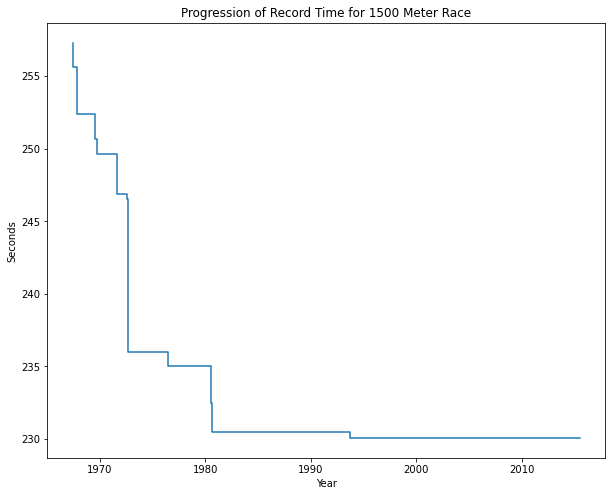

In [43]:
plt.plot(record_progression["Date"], record_progression["Time Seconds"], drawstyle='steps')
plt.ylabel("Seconds")
plt.xlabel("Year")
plt.title("Progression of Record Time for 1500 Meter Race");